<a href="https://colab.research.google.com/github/2bahaa/Frozen-Lake-Environment-Using-Reinforcement-Learning-/blob/main/reinforcementtrial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import gym
import time

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
env= gym.make('FrozenLake-v1')
STATE=env.observation_space.n #define number of states possible
ACTION=env.action_space.n     #define number of Actions possible

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [5]:
Q=np.zeros((STATE,ACTION)) #define Q table with inital values of zeros
#constants initalizing
Learning_rate=0.83
Discount_factor=0.96
epsilon=0.9
max_episodes=10000
max_steps=100
Render=False


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
rewards = []
for episode in range(max_episodes):

  state = env.reset()
  for _ in range(max_steps):

    if Render:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + Learning_rate * (reward + Discount_factor * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[8.66747786e-02 4.42524858e-03 3.05198211e-03 4.90121728e-03]
 [1.98330861e-03 2.65239416e-03 2.96613279e-03 1.99628141e-01]
 [2.45064874e-03 3.08052783e-03 3.16485530e-03 2.47541833e-01]
 [1.99679844e-03 6.18819668e-04 2.88869377e-03 1.43966069e-01]
 [1.12609364e-01 1.08100682e-03 2.57542613e-03 1.15938070e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.84169769e-08 5.36793116e-08 7.14899027e-02 7.43100722e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.54254388e-03 1.29265087e-03 1.48410637e-03 3.36202216e-01]
 [8.66431672e-04 4.71711659e-01 9.61345058e-04 7.77093024e-04]
 [2.59099623e-01 1.22483467e-04 1.07989182e-04 5.07336517e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.03082935e-02 7.30555790e-02 7.97117458e-01 1.52535737e-02]
 [8.76982478e-02 9.69680271e-01 5.65813740e-02 1.11012597e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

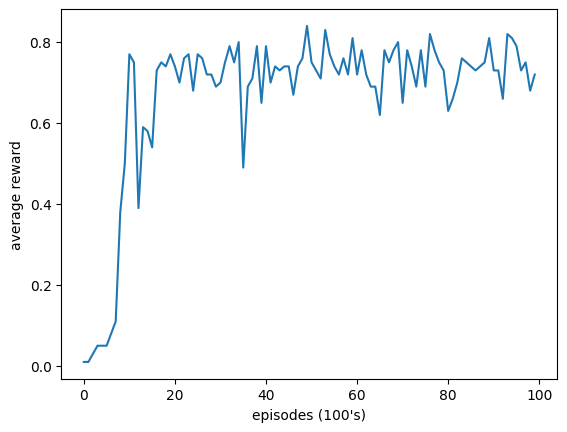

In [7]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()